In [2]:
import cells_extractor

mask = cells_extractor.get_omnipose_mask_dict("/Users/sherryyang/Documents/wiggins-lab/data/1023/xy5/masks/*.png")
cells, error = cells_extractor.get_cells_set_by_mask_dict(mask)

In [2]:
cell_set

{Cell: frame_140, label_43, <-0x18b11377b4224000>,
 Cell: frame_113, label_26, <-0x5e609481e709ffff>,
 Cell: frame_132, label_39, <0x677d39e7cb378003>,
 Cell: frame_133, label_4, <0x575dad212a026004>,
 Cell: frame_138, label_119, <-0x110e3d8fa2d61ff9>,
 Cell: frame_91, label_7, <-0x3e232ce0e3911ff4>,
 Cell: frame_42, label_2, <0x6a355f092800a00e>,
 Cell: frame_83, label_3, <0x50105c21bc8a00f>,
 Cell: frame_110, label_20, <0x4ab086cc4eb0600e>,
 Cell: frame_102, label_16, <-0x722b4690b1f5dfef>,
 Cell: frame_134, label_85, <-0x54d9494713bc7fed>,
 Cell: frame_94, label_12, <0xe0306cecd63e014>,
 Cell: frame_140, label_128, <0x7d6cdd9374536018>,
 Cell: frame_131, label_79, <0x5437d20721fde020>,
 Cell: frame_137, label_10, <0x3dca04b62a542021>,
 Cell: frame_123, label_75, <-0x68a3fb55dea85fdd>,
 Cell: frame_84, label_4, <-0x60b8d65894da9fdc>,
 Cell: frame_124, label_40, <-0x78c3881c7fdd7fdc>,
 Cell: frame_103, label_17, <0x6524f8111d66e026>,
 Cell: frame_116, label_36, <-0x359f55798083bfd9>,


In [3]:
from link_reader import LinkReader

In [4]:
reader = LinkReader(cell_set)

In [37]:
spots_filename = "/Users/sherryyang/Documents/wiggins-lab/data/spots-simple.csv"
edge_filename = "/Users/sherryyang/Documents/wiggins-lab/data/tracks-simple.csv"
G = reader.abstract_trackmate_linking_result(spots_filename, edge_filename)

In [22]:
pos = {}
location = 0

cells = list(cell_set)
cells.sort()

stary_cell = set()
left_pos = 0
for cell in cells:
    if len(set(G.predecessors(cell))) == 0 and  len(set(G.successors(cell))) == 0:
        stary_cell.add(cell)
    elif cell not in pos:
        make_pos(G, cell, pos, left_pos, 1)
        left_pos += 1

In [29]:
pos = {}
cells = list(cell_set)
cells.sort()

left_pos = 0
for cell in cells:
    if cell not in pos:
        make_pos(G, cell, pos, left_pos, 1)
        left_pos += 1

In [30]:
def make_pos(G, node, pos, left_pos, width):
   pos[node] = (left_pos + width/2, -1 * node.frame)
   children_nodes =  list(G.successors(node))
   children_nodes.sort()
   if len(children_nodes) == 0 : return 
   slice_width = width / len(children_nodes)
   for i in range(len(children_nodes)):
      node = children_nodes[i]
      make_pos(G, node, pos, left_pos + i * slice_width, slice_width)

In [57]:
from cell import Cell
cell = Cell(100,2)

In [59]:
edges = G.out_edges(cell)

In [64]:
for edge in edges:
    print(edge)

tag_dict = {"merge": set}
tag_dict["merge"].update(set(edges))

(Cell: frame_100, label_2, <-0x6f7aab17c5ee0528>, Cell: frame_101, label_2, <0x2bb513f64333151a>)


In [6]:
cell_list = list(cells)
cell_list.sort()

In [79]:
cell_list[-1]

Cell: frame_140, label_157, <0x45eb3479575cc52>

In [80]:
cell = Cell(140, 157)

In [81]:
outgoing = len(list(G.successors(cell)))
incoming = len(list(G.predecessors(cell)))

In [87]:
incoming 

1

In [88]:
outgoing 

0

In [83]:
list(G.successors(cell))

[]

In [77]:
cell

Cell: frame_103, label_26, <0x2e49e03f7722b2>

In [106]:
len(tag_dict["split"])

157

In [103]:
len(G.edges())

4380

In [ ]:
tag_dict = tag_type(G)
node_colors, node_sizes, edge_colors = mark_cell_style(G, tag_dict)

import matplotlib.pyplot as plt
plt.figure(figsize=(15, 12)) 

import networkx as nx

for node in G.nodes():
    nx.draw_networkx_nodes(G, pos, nodelist=[node], node_size=node_sizes[node], node_color=node_colors[node])
# Draw each edge individually
for edge in G.edges():
    nx.draw_networkx_edges(G, pos, edgelist=[edge], width=1, edge_color=edge_colors[edge], arrows= False)

In [109]:
tag_dict = tag_type(G)
node_colors, node_sizes, edge_colors = mark_cell_style(G, tag_dict)

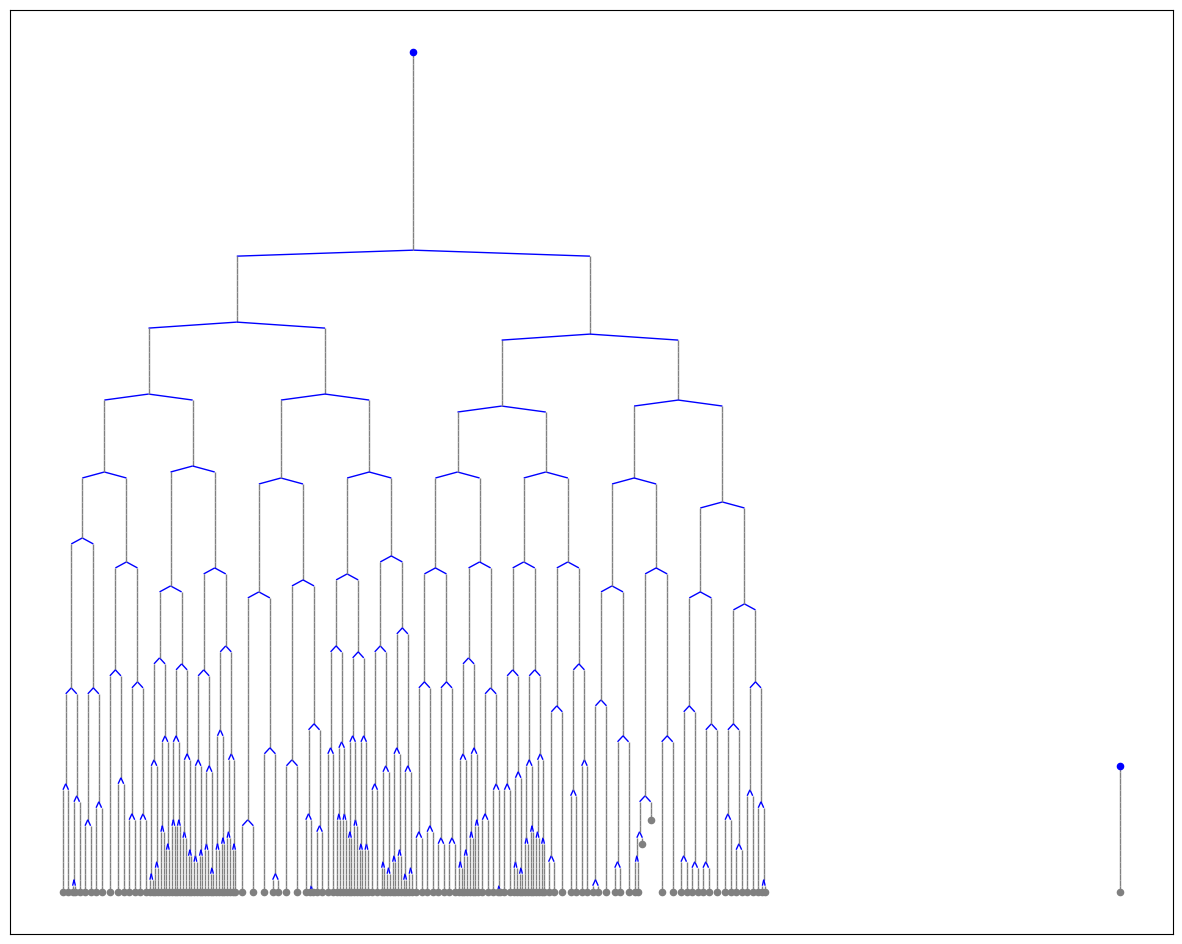

In [110]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 12)) 

import networkx as nx

for node in G.nodes():
    nx.draw_networkx_nodes(G, pos, nodelist=[node], node_size=node_sizes[node], node_color=node_colors[node])
# Draw each edge individually
for edge in G.edges():
    nx.draw_networkx_edges(G, pos, edgelist=[edge], width=1, edge_color=edge_colors[edge], arrows= False)

In [11]:
from cell import Cell
set(G.successors(Cell(1,1)))

{Cell: frame_2, label_1, <0x5e4c03d9f61c5545>}

In [2]:
import cells_extractor

mask = cells_extractor.get_mask_dict("/Users/sherryyang/Documents/wiggins-lab/data/manually_fixed/*")
set, error  = cells_extractor.get_cells_set_by_mask_dict(mask, force = True)

Frame:7, Mask label:21. Pixels number = 9. cannot make polygon. A linearring requires at least 4 coordinates.
Frame:7, Mask label:23. Pixels number = 32. cannot make polygon. A linearring requires at least 4 coordinates.
Frame:8, Mask label:1. Pixels number = 2. cannot make polygon. A linearring requires at least 4 coordinates.
Frame:12, Mask label:46. Pixels number = 1. cannot make polygon. A linearring requires at least 4 coordinates.
Frame:14, Mask label:1. Pixels number = 1. cannot make polygon. A linearring requires at least 4 coordinates.
Frame:23, Mask label:26. Pixels number = 2. cannot make polygon. A linearring requires at least 4 coordinates.
Frame:30, Mask label:59. Pixels number = 1. cannot make polygon. A linearring requires at least 4 coordinates.
Frame:30, Mask label:132. Pixels number = 13. cannot make polygon. A linearring requires at least 4 coordinates.


/Users/sherryyang/Projects/super-segger-toolkit/cells_extractor.py:75: UserWarning: Disconnected multi-pieces found on single mask/cell label
  warnings.warn(f"{e}")


Frame:32, Mask label:115. Pixels number = 7368. cannot make polygon. A linearring requires at least 4 coordinates.
Frame:32, Mask label:149. Pixels number = 32. cannot make polygon. A linearring requires at least 4 coordinates.
Frame:34, Mask label:104. Pixels number = 2. cannot make polygon. A linearring requires at least 4 coordinates.


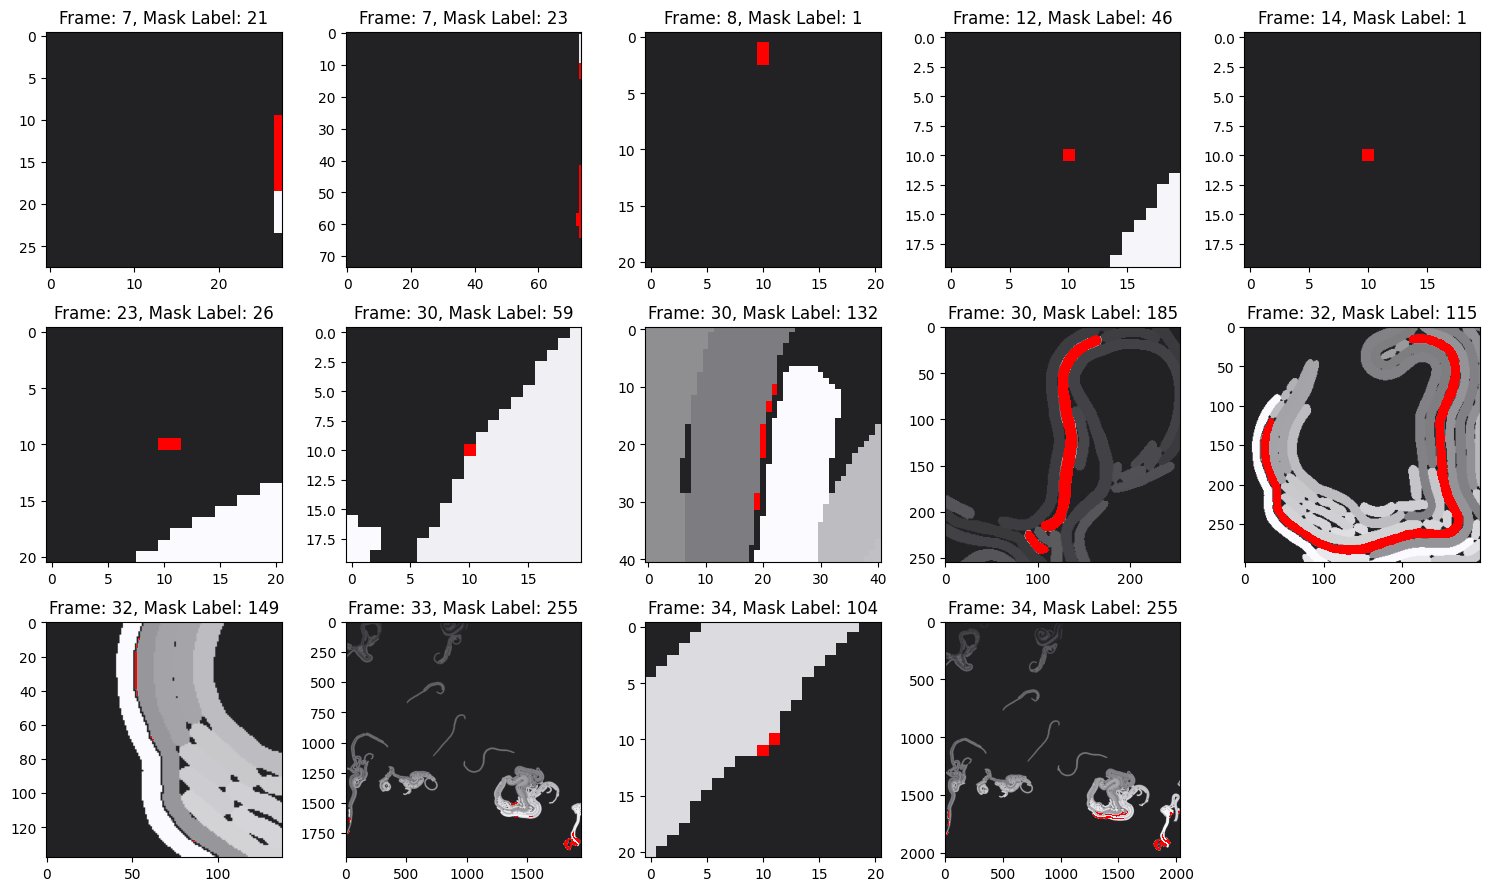

In [3]:
import visualizer
visualizer.plot_error_masks(mask,error)

In [4]:
set

{Cell: frame_26, label_21, <-0x7fe21dd40207e000>,
 Cell: frame_18, label_17, <-0x3cbdeb3102ae1ffd>,
 Cell: frame_32, label_101, <0x7926ab48fea8004>,
 Cell: frame_24, label_97, <0x4ab69d578f444007>,
 Cell: frame_28, label_67, <-0x3c38a102e0fbdff0>,
 Cell: frame_29, label_32, <0x769db779fdcf0011>,
 Cell: frame_33, label_182, <0x5b5b744c522ba013>,
 Cell: frame_34, label_147, <0x4b3be785b0f68014>,
 Cell: frame_0, label_5, <-0x2b4b7af8e592dfea>,
 Cell: frame_19, label_18, <0x5d8838b44caea018>,
 Cell: frame_6, label_48, <-0x5905541e5d82ffe5>,
 Cell: frame_11, label_14, <-0x224979ec33f79fe5>,
 Cell: frame_29, label_68, <0x5e0d82e26e60e025>,
 Cell: frame_21, label_64, <-0x5ece4a7a92455fd8>,
 Cell: frame_27, label_107, <0x7377dc5ff5ca802d>,
 Cell: frame_33, label_38, <-0x65ebd63481df3fd2>,
 Cell: frame_25, label_34, <-0x22c7a39182857fcf>,
 Cell: frame_30, label_112, <-0x357d533d9407fcb>,
 Cell: frame_3, label_15, <-0x3f9456acff0c9fc4>,
 Cell: frame_22, label_28, <-0x79b688434ccb1fc2>,
 Cell: fr

In [6]:
import networkx as nx
G = nx.Graph()

# Add each cell in the set as a node to the graph
for cell in set:
    G.add_node(cell)

# Now G contains all the cells as nodes
# You can check by printing all the nodes
print(G.nodes())

[Cell: frame_26, label_21, <-0x7fe21dd40207e000>, Cell: frame_18, label_17, <-0x3cbdeb3102ae1ffd>, Cell: frame_32, label_101, <0x7926ab48fea8004>, Cell: frame_24, label_97, <0x4ab69d578f444007>, Cell: frame_28, label_67, <-0x3c38a102e0fbdff0>, Cell: frame_29, label_32, <0x769db779fdcf0011>, Cell: frame_33, label_182, <0x5b5b744c522ba013>, Cell: frame_34, label_147, <0x4b3be785b0f68014>, Cell: frame_0, label_5, <-0x2b4b7af8e592dfea>, Cell: frame_19, label_18, <0x5d8838b44caea018>, Cell: frame_6, label_48, <-0x5905541e5d82ffe5>, Cell: frame_11, label_14, <-0x224979ec33f79fe5>, Cell: frame_29, label_68, <0x5e0d82e26e60e025>, Cell: frame_21, label_64, <-0x5ece4a7a92455fd8>, Cell: frame_27, label_107, <0x7377dc5ff5ca802d>, Cell: frame_33, label_38, <-0x65ebd63481df3fd2>, Cell: frame_25, label_34, <-0x22c7a39182857fcf>, Cell: frame_30, label_112, <-0x357d533d9407fcb>, Cell: frame_3, label_15, <-0x3f9456acff0c9fc4>, Cell: frame_22, label_28, <-0x79b688434ccb1fc2>, Cell: frame_14, label_24, <-

In [9]:
len(G.nodes())

2685

In [10]:
from cell import Cell
G.add_edge(Cell(26,21), Cell(18,17))

In [13]:
G.add_edge(1, 2)

In [14]:
len(G.nodes())

2687

In [12]:
G.edges()

EdgeView([(Cell: frame_26, label_21, <-0x7fe21dd40207e000>, Cell: frame_18, label_17, <-0x3cbdeb3102ae1ffd>)])

In [8]:
for index, row in spots_current.iterrows():
    trackmate_x = row['POSITION_X']
    trackmate_y = row['POSITION_Y']
    trackmate_area = row['AREA']

    candidate = df.loc[ ((abs(df['x_mean'] - trackmate_x)  + abs(df['y_mean'] - trackmate_y)) < 2 ) ]

    if len(candidate) == 0 or len(candidate) > 1:
        raise ValueError('Not 1:1 relationship')
    else:
        label = candidate.iloc[0]['label']

    binary_mask = ((mask == label) * 255).astype(np.uint8)
    contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    source = tracks[tracks['SPOT_TARGET_ID'] == row['LABEL']]
    if len(source) > 1:
        source_cell = source.iloc[0]
        source_spot = spots[spots['LABEL'] == source_cell['SPOT_SOURCE_ID']].loc[0]

        if(len(tracks[tracks['SPOT_SOURCE_ID'] == source_cell['SPOT_SOURCE_ID']]) == 1):
            color = (0,255,0)
            cv2.line(tif_image, (row['POSITION_X'], row['POSITION_Y']), (source_spot['POSITION_X'], source_spot['POSITION_Y']), color)
        else:
            color = (0,0,255)
            cv2.line(tif_image, (row['POSITION_X'], row['POSITION_Y']), (source_spot['POSITION_X'], source_spot['POSITION_Y']), color)

    else:
        color = (255,0,0)

    cv2.drawContours(tif_image, contours, -1, color, 2)

[Cell: frame_0, label_2, <0x63fca45ae467b492>,
 Cell: frame_0, label_3, <-0x41b392db3247e415>,
 Cell: frame_0, label_4, <0x189c35eeb7088344>,
 Cell: frame_0, label_5, <-0x2b4b7af8e592dfea>,
 Cell: frame_0, label_6, <-0xe05cceb7c427891>,
 Cell: frame_0, label_8, <0x8624af6d0728b9a>,
 Cell: frame_0, label_9, <-0x3b8565f0cc28d794>,
 Cell: frame_0, label_10, <-0x1e3fb7e362d8703b>,
 Cell: frame_0, label_11, <0x3c1010e68677f71e>,
 Cell: frame_0, label_14, <0xe9077e13691981b>,
 Cell: frame_0, label_15, <0x2bd625ee9fe1ff74>,
 Cell: frame_0, label_16, <-0x18118af8fcb963ba>,
 Cell: frame_0, label_17, <0x423e3dd0ec97039f>,
 Cell: frame_0, label_19, <0x1b9c3af6b94c07ca>,
 Cell: frame_0, label_21, <0x320452d906010bf5>,
 Cell: frame_0, label_22, <-0x73abe45d10ae8cb2>,
 Cell: frame_0, label_23, <0xb624ffed2b61020>,
 Cell: frame_0, label_24, <0x65b218c8bc067779>,
 Cell: frame_0, label_25, <-0x3ffe1e6d5aa9212e>,
 Cell: frame_0, label_26, <0x7c1a30ab08bb7ba4>,
 Cell: frame_0, label_27, <-0x66a021478df41

In [111]:
cell_list[1]

Cell: frame_1, label_1, <0x746be2e2370f37ea>

In [136]:
from PIL import Image, ImageDraw

# Load your image
image = Image.open('/Users/sherryyang/Documents/wiggins-lab/data/1024/xy5/phase/2016-06-16_zstack007t001xy5c1.tif')

# Create a drawing object
draw = ImageDraw.Draw(image)

# Define the points of the polygon (x, y tuples)

# Draw the polygon
draw.polygon(cell_list[1].polygon.exterior.coords, outline='red')

# Save or show the image
#image.save('path_to_save_image.jpg')
# or
image.show()

In [152]:
from PIL import Image
import numpy as np

def convert_to_8bit(image_path):
    # Open the image
    image = Image.open(image_path)
    image_array = np.array(image)
    # Normalize the image to [0, 1]
    normalized_image = image_array / np.max(image_array)
    # Scale to [0, 255]
    scaled_image = (normalized_image * 255).astype(np.uint8)
    # Convert back to PIL image
    image_8bit = Image.fromarray(scaled_image, mode='L')
    return image_8bit

# Replace this with your image file path
file_path = '/Users/sherryyang/Documents/wiggins-lab/data/1024/xy5/phase/2016-06-16_zstack007t001xy5c1.tif'
converted_image = convert_to_8bit(file_path)

mask1 = Image.open(file_path)
image_rgb = 
image_rgb = converted_image.convert('RGB')
draw = ImageDraw.Draw(image_rgb)
draw.polygon(cell_list[1].polygon.exterior.coords, outline='red')
# Show the converted image
image_rgb.show()

In [155]:
tif_image = cv2.imread('/Users/sherryyang/Documents/wiggins-lab/data/1024/xy5/phase/2016-06-16_zstack007t001xy5c1.tif')
cv2.imshow('Outlined TIF Image', tif_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [5]:
import cv2
from PIL import Image, ImageDraw, ImageFont
import numpy as np

# Step 1: Read the TIF image using OpenCV
tif_image = cv2.imread('/Users/sherryyang/Documents/wiggins-lab/data/1024/xy5/phase/2016-06-16_zstack007t001xy5c1.tif')

# Step 2: Convert the OpenCV image (BGR) to PIL image (RGB)
image_rgb = Image.fromarray(cv2.cvtColor(tif_image, cv2.COLOR_BGR2RGB))

# Step 3: Draw the polygon
draw = ImageDraw.Draw(image_rgb)
font = ImageFont.load_default()

# Assuming cell_list[1].polygon.exterior.coords is a list of tuples (x, y)
draw.polygon(cell_list[1].polygon.exterior.coords, outline='red')
draw.text((cell_list[1].polygon.centroid.x, cell_list[1].polygon.centroid.y), "1", fill="blue", font=font)

# Step 4: Convert back to OpenCV image if needed
tif_image_with_polygon = cv2.cvtColor(np.array(image_rgb), cv2.COLOR_RGB2BGR)
font = ImageFont.load_default()  # You can also specify a custom font


# Display the image with OpenCV
cv2.imshow('Outlined TIF Image', tif_image_with_polygon)
cv2.waitKey(0)
cv2.destroyAllWindows()  # Don't forget to add this to close the window

In [ ]:
image = cv2.imread('/Users/sherryyang/Documents/wiggins-lab/data/1024/xy5/phase/2016-06-16_zstack007t001xy5c1.tif')
                   
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert color from BGR to RGB (matplotlib uses RGB)
draw = ImageDraw.Draw(image_rgb)

fig, ax = plt.subplots()
ax.imshow(image)

# Example coordinates and label
x, y = 100, 100  # Replace with actual coordinates
label = "Your Label"

# Add the text annotation
ax.text(x, y, str(label), color='black', bbox=dict(facecolor='white', edgecolor='black', boxstyle='circle'), fontsize=8, horizontalalignment='center', verticalalignment='center')

plt.show()

In [4]:
import cv2
from PIL import Image, ImageDraw, ImageFont
import numpy as np

In [11]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Create a new figure and axis
fig, ax = plt.subplots()

image = cv2.imread('/Users/sherryyang/Documents/wiggins-lab/data/1024/xy5/phase/2016-06-16_zstack007t001xy5c1.tif')
                   
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Define the vertices of the polygon
polygon_vertices = cell_list[1].polygon.exterior.coords

# Create a polygon patch
polygon = patches.Polygon(polygon_vertices, closed=True, edgecolor='r', facecolor='none')

# Add the polygon patch to the axis
ax.add_patch(polygon)

ax.text(cell_list[1].polygon.centroid.x, cell_list[1].polygon.centroid.y, "1", color='black', bbox=dict(facecolor='white', edgecolor='black', boxstyle='circle'), fontsize=1, horizontalalignment='center', verticalalignment='center')

plt.show()


ValueError: Image size of 78886x61560 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 640x480 with 1 Axes>

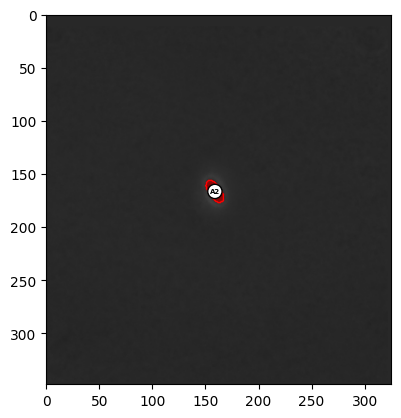

In [27]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2

# Load and convert the image
image = cv2.imread('/Users/sherryyang/Documents/wiggins-lab/data/1024/xy5/phase/2016-06-16_zstack007t001xy5c1.tif')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Create a new figure and axis
fig, ax = plt.subplots()

# Display the image
ax.imshow(image)

# Define the vertices of the polygon
# Ensure this is a list of (x, y) tuples
polygon_vertices = cell_list[1].polygon.exterior.coords

# Create a polygon patch
polygon = patches.Polygon(polygon_vertices, closed=True, edgecolor='r', facecolor='#FF000080')

# Add the polygon patch to the axis
ax.add_patch(polygon)

# Add text annotation
centroid_x = cell_list[1].polygon.centroid.x
centroid_y = cell_list[1].polygon.centroid.y
ax.text(centroid_x, centroid_y, "A2", color='black', fontweight='bold', bbox=dict(facecolor='white', edgecolor='black', boxstyle='circle'), fontsize=5, horizontalalignment='center', verticalalignment='center')

# Optionally, set the axis limits based on the image size
ax.set_xlim(0, image.shape[1])
ax.set_ylim(image.shape[0], 0)

plt.show()


In [31]:
from link_reader import LinkReader
reader = LinkReader(cells)

In [32]:
reader.cells_frame_dict[1]

{Cell: frame_1, label_1, <0x746be2e2370f37ea>}

In [81]:
import string

def get_label_info(G, alphabet_label):
    cells = list(G.nodes())
    cells.sort()

    max_frame = cells[-1].frame 

    info = {}
    cell_id = 0

    if alphabet_label:
        alphabet = string.ascii_uppercase

    def get_new_label():
        nonlocal cell_id 
        label = alphabet[cell_id % len(alphabet)] if alphabet_label else cell_id
        cell_id = cell_id + 1
        return label

    for cell in cells:
        if cell not in info:
            outgoing = len(list(G.successors(cell)))
            incoming = len(list(G.predecessors(cell)))
            # has mother
            if incoming > 0:
                # normal
                mother = list(G.predecessors(cell))[0]
                if outgoing == 1 and incoming == 1:
                    info[cell] = (info[mother][0],"regular")
                # split
                elif outgoing > 1:
                    # label itself 
                    info[cell] = (info[mother][0],"split")
                    # label it's outgoing cells 
                    cell_list = list(G.successors(cell))
                    cell_list.sort()
                    for i in range(len(cell_list)):
                        outgoing_cell = cell_list[i]
                        label = get_new_label() if not alphabet_label else info[mother][0] + str(i)
                        info[outgoing_cell] = (label,"splited")
                # merge
                elif incoming > 1:
                    # label itself
                    label = get_new_label()
                    info[cell] = (label ,"merge")
                    # label it's incoming cells 
                    cell_list = list(G.predecessors(cell))
                    cell_list.sort()
                    for i in range(len(cell_list)):
                        income_cell = cell_list[i]
                        assert income_cell in info, "the cell frame before current cell haven't be labeled"
                        label = info[cell][0]+ str(i) if alphabet_label else info[income_cell][0]
                        info[cell] = (label,"merged")
            # new birth   
            if incoming == 0 and outgoing > 0:
                label = get_new_label()
                info[cell] = (label, "birth")
            elif outgoing == 0 and incoming > 0 and cell.frame != max_frame:
                info[cell] = (info[mother][0],"death")

    return info

In [82]:
info = get_label_info(G, False)

In [33]:
a = (1,2)

In [35]:
a[1]

2

In [56]:
import glob
import os

base_dir = '/Users/sherryyang/Documents/wiggins-lab/data/1024/xy5/phase'
video_dir = os.path.join(base_dir, "video")
os.makedirs(video_dir, exist_ok=True)

# Name your file (you can also make this dynamic as per your requirements)
filename = "*.tif"
file_path = os.path.join(base_dir, filename)

files = glob.glob(file_path)
files.sort()

In [59]:
files

['/Users/sherryyang/Documents/wiggins-lab/data/1024/xy5/phase/2016-06-16_zstack007t001xy5c1.tif',
 '/Users/sherryyang/Documents/wiggins-lab/data/1024/xy5/phase/2016-06-16_zstack007t002xy5c1.tif',
 '/Users/sherryyang/Documents/wiggins-lab/data/1024/xy5/phase/2016-06-16_zstack007t003xy5c1.tif',
 '/Users/sherryyang/Documents/wiggins-lab/data/1024/xy5/phase/2016-06-16_zstack007t004xy5c1.tif',
 '/Users/sherryyang/Documents/wiggins-lab/data/1024/xy5/phase/2016-06-16_zstack007t005xy5c1.tif',
 '/Users/sherryyang/Documents/wiggins-lab/data/1024/xy5/phase/2016-06-16_zstack007t006xy5c1.tif',
 '/Users/sherryyang/Documents/wiggins-lab/data/1024/xy5/phase/2016-06-16_zstack007t007xy5c1.tif',
 '/Users/sherryyang/Documents/wiggins-lab/data/1024/xy5/phase/2016-06-16_zstack007t008xy5c1.tif',
 '/Users/sherryyang/Documents/wiggins-lab/data/1024/xy5/phase/2016-06-16_zstack007t009xy5c1.tif',
 '/Users/sherryyang/Documents/wiggins-lab/data/1024/xy5/phase/2016-06-16_zstack007t010xy5c1.tif',
 '/Users/sherryyang/

In [52]:
assert len(files) == len(reader.cells_frame_dict), "The raw image and linking length is not match"

In [63]:
cell_frame_dict = reader.cells_frame_dict

In [72]:
file_path

'/Users/sherryyang/Documents/wiggins-lab/data/1024/xy5/phase/*.tif'

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2

for frame in range(len(files)):
    # Load and convert the image
    file = files[frame]
    image = cv2.imread(file)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    output_path = os.path.join(video_dir, f"frame{frame:05d}.png")
    # Create a new figure and axis
    fig, ax = plt.subplots()

    ax = get_single_frame_visualization(ax, image, reader.cells_frame_dict, info, frame)
    
    plt.axis('off')
    plt.tight_layout()
    plt.savefig(output_path, bbox_inches='tight', pad_inches=0, transparent=True)

In [83]:
def get_single_frame_visualization(ax, image, cells_frame_dict, info, frame, circle_label = False, representative_point = False ):
    # Display the image
    ax.imshow(image)

    for cell in cells_frame_dict[frame]:
        color_dict = {"regular": "#C8C8C8", "split":"#1500FF", "splited":"#756BE1", "merge":"#30FF00", "merged":"#8DE279", "death":"#FF0000", "birth": "#FF00ED"}
        if cell in info:
            # Ensure this is a list of (x, y) tuples
            polygon_vertices = cell.polygon.exterior.coords

            color = color_dict[info[cell][1]]
            label = info[cell][0]

            # Half transparent
            facecolor = color + "60"

            # Create a polygon patch
            polygon = patches.Polygon(polygon_vertices, closed=True, edgecolor=color, facecolor=facecolor)

            # Add the polygon patch to the axis
            ax.add_patch(polygon)

            if representative_point: 
                 # this is not center of cell, but a point that guaranteed in polygon
                centroid_x = cell.polygon.representative_point().x
                centroid_y = cell.polygon.representative_point().x
            else:
                # Add text annotation
                centroid_x = cell.polygon.centroid.x
                centroid_y = cell.polygon.centroid.y

            if circle_label:
                ax.text(centroid_x, centroid_y, str(label), color='black', fontweight='bold', bbox=dict(facecolor='white', edgecolor='black', boxstyle='circle'), fontsize=5, horizontalalignment='center', verticalalignment='center')
            else:
                ax.text(centroid_x, centroid_y, str(label), color='white', fontweight='bold', fontsize=5, horizontalalignment='center', verticalalignment='center')

    # Optionally, set the axis limits based on the image size
    ax.set_xlim(0, image.shape[1])
    ax.set_ylim(image.shape[0], 0)

    return ax 


In [92]:
cell_list[1].polygon.representative_point().x
cell_list[1].polygon.representative_point().y

166.5

In [73]:
file_path

'/Users/sherryyang/Documents/wiggins-lab/data/1024/xy5/phase/*.tif'

In [ ]:
cv2.destroyAllWindows()

In [7]:
import cv2
import numpy as np

# Load the TIF image
tif_image = cv2.imread('/Users/sherryyang/Documents/wiggins-lab/data/1024/xy5/phase/2016-06-16_zstack007t001xy5c1.tif')

poly_points = np.array(cells[1].polygon.exterior.coords).astype(np.int32).reshape(-1, 1, 2)


cv2.drawContours(tif_image, poly_points, -1, (255, 0, 0), 2)
cv2.imshow('Output', tif_image)
# Save the final image after all contours are drawn
#cv2.imwrite('output_image.tif', tif_image)
plt.imshow(image)


TypeError: 'set' object is not subscriptable